# Part 2 - 2: Tokenization

In this notebook we are interested in two sections: compute **tokens no in sentences** and **compute tokens in  sentences**. In each section we will consider the following questions

1) the vocabulary (set of unique tokens) recognised by NLTK, Spacy
and their respective size.

2) the intersection of these two vocabularies


3) the sets of tokens that is specific to NLTK and Spacy


In [21]:
import re

def remove_underscores(text:str)->str:
    return text.replace("_", " ")

# A function to remove excess whitespaces from the text
def remove_excess_whitespace(text:str)->str:
    return " ".join(text.split())

# A function to remove \n or \t from the text
def remove_newline_tab(text:str)->str:
    return text.replace("\n", " ").replace("\t", " ")

# A function to remove quotations from the text
def remove_quotations(text:str)->str:
    return re.sub(re.compile("\[\d*\]"), "", text)

# A function to clean the text by calling the above functions
def clean_text(text:str)->str:
    text = remove_underscores(text)
    text = remove_newline_tab(text)
    text = remove_quotations(text)
    text = remove_excess_whitespace(text)
    text = text.lower()
    return text

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# download stopwords in nltk
nltk.download('stopwords')


def get_tokens_set_NLTK(text):
    """A function that returns a set of unique token recognized by NLTK""" 

    return set(word_tokenize(text))

def get_filtered_tokens_set_NLTK(tokens_set):
  """A function that returns a set of unique tokens from which we have removed NLTK stopwords and punctuation"""

  stop_words =set(stopwords.words('english'))
  filtered = set()

# Remove the stop words and punctuation from the tokens set
  for token in tokens_set:
      if token not in stop_words and not token.ispunct():
          filtered.add(token)
          
  return filtered

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bleuze3u\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bleuze3u\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
import spacy
from spacy.tokenizer import Tokenizer
nlp_spacy =spacy.load("en_core_web_sm")


def get_tokens_set_spacy(text):
    """A function that returns a set of unique token recognized by Spacy"""

    doc_spacy = nlp_spacy(text)
    return set([token.text for token in doc_spacy])

def get_filtered_tokens_set_spacy(tokens_set):
    """A function that returns a set of unique token recognized by Spacy and then remove the stop word and punctuation """
  
    filtered = set()
    stop_word_spacy=nlp_spacy.Defaults.stop_words

    for token in tokens_set:
        if not token.is_punct and not token.is_stop:
            filtered.add(token)
    
    return filtered

# SharedTokensNoSentences

In [24]:
import pandas as pd
with open('../../data/part2/dataset.txt') as f:
    text = f.read()

In [25]:
#Get clean articles by removing redundant symbols
Clean_text=clean_text(text)

#Get the tokens by NLTK
tokens_NLTK = get_tokens_set_NLTK(Clean_text)

#Get the number of  tokens by NLTK
nb_tokens_NLTK = len(tokens_NLTK)

#Get the token by Spacy
tokens_Spacy = get_tokens_set_spacy(Clean_text)

#Get the number of  tokens by Spacy
nb_tokens_Spacy = len(tokens_Spacy)

#Get the set of common tokens recognized by NLTK and Spacy
common_token=set(tokens_NLTK) & set(tokens_Spacy)

#Get number of set of common tokens recognized by NLTK and Spacy
nb_common_token=len(common_token)

#Get the set of tokens exist only in NLTK
only_token_NLTK=set(tokens_NLTK).difference(set(common_token))

#Get the number of set of tokens exist only in NLTK
nb_only_token_NLTK=len(only_token_NLTK)

#Get the set of tokens exist only in Spacy
only_token_Spacy=set(tokens_Spacy).difference(set(common_token))

#Get the number of set of tokens exist only in Spacy
nb_only_token_Spacy=len(only_token_Spacy)

print("Tokens obtained by NLTK: ", tokens_NLTK )
print("Number of tokens obtained by NLTK: ",nb_tokens_NLTK)
print("---"*100)

print("Tokens obtained by Spacy: ", tokens_Spacy )
print("Number of tokens obtained by Spacy: ",nb_tokens_Spacy)
print("---"*100)

print("Common tokens recognized by NLTK and Spacy: ", common_token)
print("Number of common tokens recognized by NLTK and Spacy: ", nb_common_token)
print("---"*100)

print("Tokens exist only in NLTK: ", only_token_NLTK)
print("Number of tokens exist only in NLTK: ", nb_only_token_NLTK)
print("---"*100)

print("Tokens exist only in Spacy: ", only_token_Spacy)
print("Number of tokens exist only in Spacy: ", nb_only_token_Spacy)


Tokens obtained by NLTK:  {'vocal', '1620', 'karl', 'mechanism', 'adapting', 'influenced', 'practices', 'making', 'again', 'end', 'utter', 'system', 'granted', 'roger', 'already', 'widely', 'effective', 'hypothesizing', 'observation', 'thinkers', 'words', 'effect', 'over', 'disagree', 'surrounding', 'well', 'conclusions', 'reveal', 'argued', 'substantial', 'psychoanalysis', 'developed', 'model', 'two', 'c.', 'hundreds', 'persistent', 'relativity', 'individual', 'any', 'wesley', "'", 'causal', 'instrumentalists', 'new', 'evaluated', '19th', 'referred', 'applied', 'explores', 'physics', 'proven', 'back', 'this', 'objectively', 'capable', 'seek', 'arises', 'but', 'other', 'question', 'maxwell', 'qualifies', 'organon—bacon', 'under', 'stewart', 'coined', 'than', 'speculation', 'row', 'fattening', 'investigations', 'best', 'richard', 'mainly', 'steady', 'jay', 'chemistry', 'explanations', 'how', 'parsimony', 'ahead', 'standard', 'philosophers', 'apply', 'certainty', 'organum', '400', 'junk'

In [26]:
# Save the results in a dataframe
df = pd.DataFrame(columns = ["NLTK_all", "NLTK_only", "spaCy_all", "spaCy_only", "shared"], data = [[tokens_NLTK, only_token_NLTK, tokens_Spacy, only_token_Spacy, common_token]])
# df.to_csv("../../data/part2/tokens.csv", index = False)

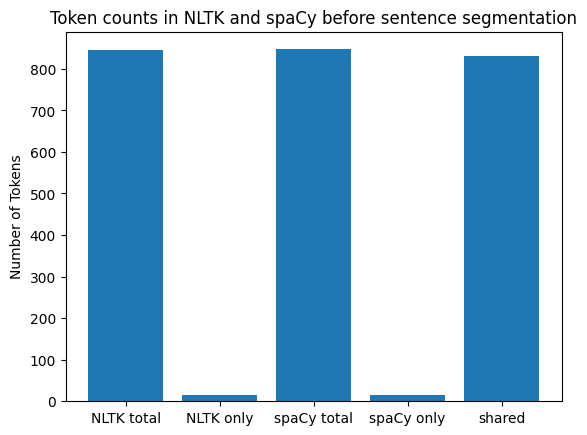

In [27]:
import matplotlib.pyplot as plt

# Define the data for the graph
x= ['NLTK total','NLTK only', 'spaCy total', 'spaCy only', 'shared',]
y= [nb_tokens_NLTK, nb_only_token_NLTK, nb_tokens_Spacy,nb_only_token_Spacy, nb_common_token]

plt.bar(x, y)
     
# Add labels to the graph
plt.title('Token counts in NLTK and spaCy before sentence segmentation')
plt.ylabel('Number of Tokens')

# Show the graph
plt.savefig('../../data/plots/2-token-counts.png')
plt.show()

# Share token in sentence

In [28]:
# import the data shared_sentences
df=pd.read_csv("../../data/part2/part2-shared-sentences.csv")

In [29]:
#Get clean articles by removing redundant symbols
df["Clean_shared_sentence"] = df["shared_sentence"].apply(clean_text)
df

,shared_sentence,Clean_shared_sentence
0,"Values emerge from science, both as product an...","values emerge from science, both as product an..."
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont..."
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h..."
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...
9,In addition to these general questions about s...,in addition to these general questions about s...


In [30]:
#Get the tokens by NLTK in each sentence
df["NLTK_tokens"] = df["Clean_shared_sentence"].apply(get_tokens_set_NLTK)
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{,, can, be, .., emerge, society, both, the, f..."
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{is, particular, culture, practitioners, value..."
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{,, .., overlaps, between, with, truth, the, w..."
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{,, have, simplicity, .., various, candidates,..."
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, therefore, will, use, inductive, b..."
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{,, least, not, can, .., observing, that, prob..."
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{principle, have, .., parsimony, philosophers,..."
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{central, ,, justified, philosophy, can, be, s..."
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{,, not, can, be, morning, .., even, again, th..."
9,In addition to these general questions about s...,in addition to these general questions about s...,"{,, ), particular, .., these, that, addition, ..."


In [31]:
# Get the number of token by NLTK for each sentence
df['nb_NLTK_tokens'] = df['NLTK_tokens'].apply(lambda x: len(x))
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{,, can, be, .., emerge, society, both, the, f...",20
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{is, particular, culture, practitioners, value...",14
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{,, .., overlaps, between, with, truth, the, w...",20
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{,, have, simplicity, .., various, candidates,...",27
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, therefore, will, use, inductive, b...",17
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{,, least, not, can, .., observing, that, prob...",26
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{principle, have, .., parsimony, philosophers,...",19
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{central, ,, justified, philosophy, can, be, s...",32
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{,, not, can, be, morning, .., even, again, th...",31
9,In addition to these general questions about s...,in addition to these general questions about s...,"{,, ), particular, .., these, that, addition, ...",27


In [32]:
# Count the total number of tokens by NLTK for all sentences
all_tokens_NLTK=df['nb_NLTK_tokens'].sum()
all_tokens_NLTK

351

In [33]:
#Get the token by Spacy for each sentence
df["Spacy_tokens"] = df["Clean_shared_sentence"].apply(get_tokens_set_spacy)
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{,, can, be, .., emerge, society, both, the, f...",20,"{,, can, be, .., emerge, society, both, the, f..."
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{is, particular, culture, practitioners, value...",14,"{is, particular, culture, practitioners, value..."
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{,, .., overlaps, between, with, truth, the, w...",20,"{,, .., overlaps, between, with, truth, the, w..."
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{,, have, simplicity, .., various, candidates,...",27,"{,, theory, have, simplicity, .., various, can..."
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, therefore, will, use, inductive, b...",17,"{reasoning, therefore, will, use, inductive, b..."
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{,, least, not, can, .., observing, that, prob...",26,"{,, least, not, can, .., observing, that, prob..."
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{principle, have, .., parsimony, philosophers,...",19,"{principle, have, .., parsimony, philosophers,..."
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{central, ,, justified, philosophy, can, be, s...",32,"{central, ,, justified, philosophy, can, be, s..."
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{,, not, can, be, morning, .., even, again, th...",31,"{,, not, can, be, morning, .., even, again, th..."
9,In addition to these general questions about s...,in addition to these general questions about s...,"{,, ), particular, .., these, that, addition, ...",27,"{,, ), particular, .., these, that, addition, ..."


In [34]:
# Get the number of token by Spacy for each sentence
df['nb_Spacy_tokens'] = df['Spacy_tokens'].apply(lambda x: len(x))
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens,nb_Spacy_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{,, can, be, .., emerge, society, both, the, f...",20,"{,, can, be, .., emerge, society, both, the, f...",20
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{is, particular, culture, practitioners, value...",14,"{is, particular, culture, practitioners, value...",14
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{,, .., overlaps, between, with, truth, the, w...",20,"{,, .., overlaps, between, with, truth, the, w...",20
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{,, have, simplicity, .., various, candidates,...",27,"{,, theory, have, simplicity, .., various, can...",29
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, therefore, will, use, inductive, b...",17,"{reasoning, therefore, will, use, inductive, b...",17
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{,, least, not, can, .., observing, that, prob...",26,"{,, least, not, can, .., observing, that, prob...",26
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{principle, have, .., parsimony, philosophers,...",19,"{principle, have, .., parsimony, philosophers,...",19
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{central, ,, justified, philosophy, can, be, s...",32,"{central, ,, justified, philosophy, can, be, s...",32
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{,, not, can, be, morning, .., even, again, th...",31,"{,, not, can, be, morning, .., even, again, th...",31
9,In addition to these general questions about s...,in addition to these general questions about s...,"{,, ), particular, .., these, that, addition, ...",27,"{,, ), particular, .., these, that, addition, ...",27


In [35]:
# Count the total number of tokens by Spacy for all sentences
all_tokens_Spacy=df['nb_Spacy_tokens'].sum()
all_tokens_Spacy

353

In [36]:
#Get the set of common tokens recognized by NLTK and Spacy in each sentence
df['common_tokens'] = [set(a) & set(b) for a, b in zip(df.Spacy_tokens, df.NLTK_tokens)]
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens,nb_Spacy_tokens,common_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{,, can, be, .., emerge, society, both, the, f...",20,"{,, can, be, .., emerge, society, both, the, f...",20,"{,, can, be, .., emerge, society, both, the, f..."
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{is, particular, culture, practitioners, value...",14,"{is, particular, culture, practitioners, value...",14,"{practitioners, is, particular, culture, value..."
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{,, .., overlaps, between, with, truth, the, w...",20,"{,, .., overlaps, between, with, truth, the, w...",20,"{,, .., overlaps, between, with, truth, the, w..."
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{,, have, simplicity, .., various, candidates,...",27,"{,, theory, have, simplicity, .., various, can...",29,"{,, have, simplicity, .., various, candidates,..."
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, therefore, will, use, inductive, b...",17,"{reasoning, therefore, will, use, inductive, b...",17,"{reasoning, will, therefore, use, inductive, i..."
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{,, least, not, can, .., observing, that, prob...",26,"{,, least, not, can, .., observing, that, prob...",26,"{,, least, not, can, .., observing, that, prob..."
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{principle, have, .., parsimony, philosophers,...",19,"{principle, have, .., parsimony, philosophers,...",19,"{principle, have, .., parsimony, philosophers,..."
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{central, ,, justified, philosophy, can, be, s...",32,"{central, ,, justified, philosophy, can, be, s...",32,"{central, ,, justified, philosophy, can, be, s..."
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{,, not, can, be, morning, .., even, again, th...",31,"{,, not, can, be, morning, .., even, again, th...",31,"{,, not, can, be, morning, .., even, again, th..."
9,In addition to these general questions about s...,in addition to these general questions about s...,"{,, ), particular, .., these, that, addition, ...",27,"{,, ), particular, .., these, that, addition, ...",27,"{,, ), particular, .., these, that, addition, ..."


In [37]:
#Get the number of common tokens recognized by NLTK and Spacy in each sentence
df['nb_common_tokens'] = df["common_tokens"].apply(lambda x: len(x))
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens,nb_Spacy_tokens,common_tokens,nb_common_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{,, can, be, .., emerge, society, both, the, f...",20,"{,, can, be, .., emerge, society, both, the, f...",20,"{,, can, be, .., emerge, society, both, the, f...",20
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{is, particular, culture, practitioners, value...",14,"{is, particular, culture, practitioners, value...",14,"{practitioners, is, particular, culture, value...",14
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{,, .., overlaps, between, with, truth, the, w...",20,"{,, .., overlaps, between, with, truth, the, w...",20,"{,, .., overlaps, between, with, truth, the, w...",20
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{,, have, simplicity, .., various, candidates,...",27,"{,, theory, have, simplicity, .., various, can...",29,"{,, have, simplicity, .., various, candidates,...",26
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, therefore, will, use, inductive, b...",17,"{reasoning, therefore, will, use, inductive, b...",17,"{reasoning, will, therefore, use, inductive, i...",17
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{,, least, not, can, .., observing, that, prob...",26,"{,, least, not, can, .., observing, that, prob...",26,"{,, least, not, can, .., observing, that, prob...",26
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{principle, have, .., parsimony, philosophers,...",19,"{principle, have, .., parsimony, philosophers,...",19,"{principle, have, .., parsimony, philosophers,...",19
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{central, ,, justified, philosophy, can, be, s...",32,"{central, ,, justified, philosophy, can, be, s...",32,"{central, ,, justified, philosophy, can, be, s...",32
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{,, not, can, be, morning, .., even, again, th...",31,"{,, not, can, be, morning, .., even, again, th...",31,"{,, not, can, be, morning, .., even, again, th...",31
9,In addition to these general questions about s...,in addition to these general questions about s...,"{,, ), particular, .., these, that, addition, ...",27,"{,, ), particular, .., these, that, addition, ...",27,"{,, ), particular, .., these, that, addition, ...",27


In [38]:
#Get the set of tokens exist only in NLTK in each sentence
df['NLTK_only_tokens'] = [set(a).difference(set(b)) for a, b in zip(df.NLTK_tokens,df.common_tokens)]
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens,nb_Spacy_tokens,common_tokens,nb_common_tokens,NLTK_only_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{,, can, be, .., emerge, society, both, the, f...",20,"{,, can, be, .., emerge, society, both, the, f...",20,"{,, can, be, .., emerge, society, both, the, f...",20,{}
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{is, particular, culture, practitioners, value...",14,"{is, particular, culture, practitioners, value...",14,"{practitioners, is, particular, culture, value...",14,{}
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{,, .., overlaps, between, with, truth, the, w...",20,"{,, .., overlaps, between, with, truth, the, w...",20,"{,, .., overlaps, between, with, truth, the, w...",20,{}
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{,, have, simplicity, .., various, candidates,...",27,"{,, theory, have, simplicity, .., various, can...",29,"{,, have, simplicity, .., various, candidates,...",26,{theory-independent}
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, therefore, will, use, inductive, b...",17,"{reasoning, therefore, will, use, inductive, b...",17,"{reasoning, will, therefore, use, inductive, i...",17,{}
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{,, least, not, can, .., observing, that, prob...",26,"{,, least, not, can, .., observing, that, prob...",26,"{,, least, not, can, .., observing, that, prob...",26,{}
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{principle, have, .., parsimony, philosophers,...",19,"{principle, have, .., parsimony, philosophers,...",19,"{principle, have, .., parsimony, philosophers,...",19,{}
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{central, ,, justified, philosophy, can, be, s...",32,"{central, ,, justified, philosophy, can, be, s...",32,"{central, ,, justified, philosophy, can, be, s...",32,{}
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{,, not, can, be, morning, .., even, again, th...",31,"{,, not, can, be, morning, .., even, again, th...",31,"{,, not, can, be, morning, .., even, again, th...",31,{}
9,In addition to these general questions about s...,in addition to these general questions about s...,"{,, ), particular, .., these, that, addition, ...",27,"{,, ), particular, .., these, that, addition, ...",27,"{,, ), particular, .., these, that, addition, ...",27,{}


In [39]:
#Get the number set of tokens exist only in NLTK for  each sentence
df['nb_NLTK_only_tokens'] =  df["NLTK_only_tokens"].apply(lambda x: len(x))
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens,nb_Spacy_tokens,common_tokens,nb_common_tokens,NLTK_only_tokens,nb_NLTK_only_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{,, can, be, .., emerge, society, both, the, f...",20,"{,, can, be, .., emerge, society, both, the, f...",20,"{,, can, be, .., emerge, society, both, the, f...",20,{},0
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{is, particular, culture, practitioners, value...",14,"{is, particular, culture, practitioners, value...",14,"{practitioners, is, particular, culture, value...",14,{},0
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{,, .., overlaps, between, with, truth, the, w...",20,"{,, .., overlaps, between, with, truth, the, w...",20,"{,, .., overlaps, between, with, truth, the, w...",20,{},0
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{,, have, simplicity, .., various, candidates,...",27,"{,, theory, have, simplicity, .., various, can...",29,"{,, have, simplicity, .., various, candidates,...",26,{theory-independent},1
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, therefore, will, use, inductive, b...",17,"{reasoning, therefore, will, use, inductive, b...",17,"{reasoning, will, therefore, use, inductive, i...",17,{},0
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{,, least, not, can, .., observing, that, prob...",26,"{,, least, not, can, .., observing, that, prob...",26,"{,, least, not, can, .., observing, that, prob...",26,{},0
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{principle, have, .., parsimony, philosophers,...",19,"{principle, have, .., parsimony, philosophers,...",19,"{principle, have, .., parsimony, philosophers,...",19,{},0
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{central, ,, justified, philosophy, can, be, s...",32,"{central, ,, justified, philosophy, can, be, s...",32,"{central, ,, justified, philosophy, can, be, s...",32,{},0
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{,, not, can, be, morning, .., even, again, th...",31,"{,, not, can, be, morning, .., even, again, th...",31,"{,, not, can, be, morning, .., even, again, th...",31,{},0
9,In addition to these general questions about s...,in addition to these general questions about s...,"{,, ), particular, .., these, that, addition, ...",27,"{,, ), particular, .., these, that, addition, ...",27,"{,, ), particular, .., these, that, addition, ...",27,{},0


In [40]:
# Count the total number of tokens exist only in Spacy
only_tokens_NLTK=df['nb_NLTK_only_tokens'].sum()
only_tokens_NLTK

1

In [41]:
#Get the set of tokens exist only in Spacy for  each sentence
df['Spacy_only_tokens'] = [set(a).difference(set(b)) for a, b in zip(df.Spacy_tokens, df.common_tokens)]
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens,nb_Spacy_tokens,common_tokens,nb_common_tokens,NLTK_only_tokens,nb_NLTK_only_tokens,Spacy_only_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{,, can, be, .., emerge, society, both, the, f...",20,"{,, can, be, .., emerge, society, both, the, f...",20,"{,, can, be, .., emerge, society, both, the, f...",20,{},0,{}
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{is, particular, culture, practitioners, value...",14,"{is, particular, culture, practitioners, value...",14,"{practitioners, is, particular, culture, value...",14,{},0,{}
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{,, .., overlaps, between, with, truth, the, w...",20,"{,, .., overlaps, between, with, truth, the, w...",20,"{,, .., overlaps, between, with, truth, the, w...",20,{},0,{}
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{,, have, simplicity, .., various, candidates,...",27,"{,, theory, have, simplicity, .., various, can...",29,"{,, have, simplicity, .., various, candidates,...",26,{theory-independent},1,"{-, independent, theory}"
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, therefore, will, use, inductive, b...",17,"{reasoning, therefore, will, use, inductive, b...",17,"{reasoning, will, therefore, use, inductive, i...",17,{},0,{}
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{,, least, not, can, .., observing, that, prob...",26,"{,, least, not, can, .., observing, that, prob...",26,"{,, least, not, can, .., observing, that, prob...",26,{},0,{}
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{principle, have, .., parsimony, philosophers,...",19,"{principle, have, .., parsimony, philosophers,...",19,"{principle, have, .., parsimony, philosophers,...",19,{},0,{}
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{central, ,, justified, philosophy, can, be, s...",32,"{central, ,, justified, philosophy, can, be, s...",32,"{central, ,, justified, philosophy, can, be, s...",32,{},0,{}
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{,, not, can, be, morning, .., even, again, th...",31,"{,, not, can, be, morning, .., even, again, th...",31,"{,, not, can, be, morning, .., even, again, th...",31,{},0,{}
9,In addition to these general questions about s...,in addition to these general questions about s...,"{,, ), particular, .., these, that, addition, ...",27,"{,, ), particular, .., these, that, addition, ...",27,"{,, ), particular, .., these, that, addition, ...",27,{},0,{}


In [42]:
#Get the number set of tokens exist only in Spacy for each sentence
df['nb_Spacy_only_tokens'] = df["Spacy_only_tokens"].apply(lambda x: len(x))
df

,shared_sentence,Clean_shared_sentence,NLTK_tokens,nb_NLTK_tokens,Spacy_tokens,nb_Spacy_tokens,common_tokens,nb_common_tokens,NLTK_only_tokens,nb_NLTK_only_tokens,Spacy_only_tokens,nb_Spacy_only_tokens
0,"Values emerge from science, both as product an...","values emerge from science, both as product an...","{,, can, be, .., emerge, society, both, the, f...",20,"{,, can, be, .., emerge, society, both, the, f...",20,"{,, can, be, .., emerge, society, both, the, f...",20,{},0,{},0
1,The scientific enterprise is embedded in parti...,the scientific enterprise is embedded in parti...,"{is, particular, culture, practitioners, value...",14,"{is, particular, culture, practitioners, value...",14,"{practitioners, is, particular, culture, value...",14,{},0,{},0
2,"This discipline overlaps with metaphysics, ont...","this discipline overlaps with metaphysics, ont...","{,, .., overlaps, between, with, truth, the, w...",20,"{,, .., overlaps, between, with, truth, the, w...",20,"{,, .., overlaps, between, with, truth, the, w...",20,{},0,{},0
3,"Yet, although various measures of simplicity h...","yet, although various measures of simplicity h...","{,, have, simplicity, .., various, candidates,...",27,"{,, theory, have, simplicity, .., various, can...",29,"{,, have, simplicity, .., various, candidates,...",26,{theory-independent},1,"{-, independent, theory}",3
4,The chicken may therefore use inductive reason...,the chicken may therefore use inductive reason...,"{reasoning, therefore, will, use, inductive, b...",17,"{reasoning, therefore, will, use, inductive, b...",17,"{reasoning, will, therefore, use, inductive, i...",17,{},0,{},0
5,One approach is to acknowledge that induction ...,one approach is to acknowledge that induction ...,"{,, least, not, can, .., observing, that, prob...",26,"{,, least, not, can, .., observing, that, prob...",26,"{,, least, not, can, .., observing, that, prob...",26,{},0,{},0
6,Philosophers have tried to make this heuristic...,philosophers have tried to make this heuristic...,"{principle, have, .., parsimony, philosophers,...",19,"{principle, have, .., parsimony, philosophers,...",19,"{principle, have, .., parsimony, philosophers,...",19,{},0,{},0
7,There is no consensus among philosophers about...,there is no consensus among philosophers about...,"{central, ,, justified, philosophy, can, be, s...",32,"{central, ,, justified, philosophy, can, be, s...",32,"{central, ,, justified, philosophy, can, be, s...",32,{},0,{},0
8,So the chicken would be right to conclude from...,so the chicken would be right to conclude from...,"{,, not, can, be, morning, .., even, again, th...",31,"{,, not, can, be, morning, .., even, again, th...",31,"{,, not, can, be, morning, .., even, again, th...",31,{},0,{},0
9,In addition to these general questions about s...,in addition to these general questions about s...,"{,, ), particular, .., these, that, addition, ...",27,"{,, ), particular, .., these, that, addition, ...",27,"{,, ), particular, .., these, that, addition, ...",27,{},0,{},0


In [43]:
# save the dataframe
df.to_csv("../../data/part2/part2-token-counts.csv", index = False)

In [44]:
# Count the total number of tokens exist only in Spacy for all sentences
only_tokens_spacy=df['nb_Spacy_only_tokens'].sum()
only_tokens_spacy

3

In [45]:
# Print out the sum of common tokens recognized by NLTK and Spacy  for all  sentences
sum_common_tokens=df['nb_common_tokens'].sum()
sum_common_tokens

350

In [46]:

print("Number of tokens obtained by NLTK: ",all_tokens_NLTK)
print("---"*100)


print("Number of tokens obtained by Spacy: ",all_tokens_Spacy)
print("---"*100)


print("Number of all common tokens recognized by NLTK and Spacy : ", sum_common_tokens)
print("---"*100)


print("Number of all tokens exist only in NLTK: ", only_tokens_NLTK)
print("---"*100)


print("Number of all tokens exist only in Spacy: ", only_tokens_spacy)

Number of tokens obtained by NLTK:  351
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Number of tokens obtained by Spacy:  353
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Number of all common tokens recognized by NLTK and Spacy :  350
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

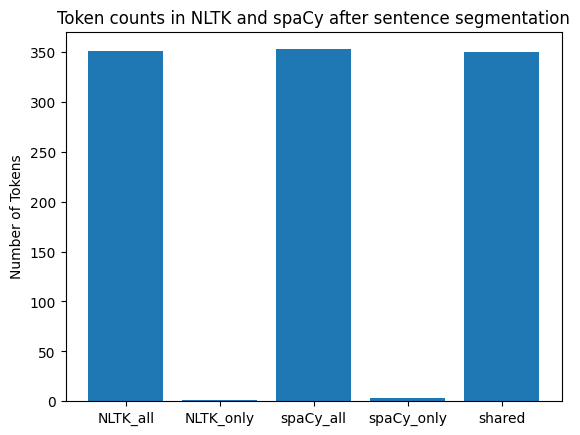

In [47]:
import matplotlib.pyplot as plt

# Define the data for the graph
x= ['NLTK_all','NLTK_only','spaCy_all', 'spaCy_only', 'shared',]
y= [all_tokens_NLTK, only_tokens_NLTK, all_tokens_Spacy, only_tokens_spacy, sum_common_tokens]

plt.bar(x, y)
     
# Add labels to the graph
plt.title('Token counts in NLTK and spaCy after sentence segmentation')
plt.ylabel('Number of Tokens')
plt.savefig('../../data/plots/2-token-counts-after-sentence-segmentation.png')

# Show the graph
plt.show()